**importing dependencies**

In [42]:
import warnings;
warnings.simplefilter('ignore')

In [43]:
import pandas as pd
import prophet

**read data**

In [76]:
url='https://raw.githubusercontent.com/nicknochnack/TimeSeriesForecastingProphet/main/dataset.csv'
df=pd.read_csv(url)

#df.describe()  //to find the mininum, max mean etc values from the dataset

prophet only uses two coloumns. therefore in our project we only use two coloumns based on which we predict our value. The coloumns we use are date(ds) and the price: y. 

In [53]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


in the following lines of code, we are changing the date format from integer to date and time datatype. in the first three lines we are extracting year, month and day then we are concatenating all three to get ds.

In [77]:
#df.dtypes
df['Year']=df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month']=df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day']=df['Time Date'].apply(lambda x: str(x)[:-6])

df['ds']=pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])



we are dropping coloumns which are not needed, we only need ds and value.
also we are changing the value coloumn to y.. axis is a filter and inplace means we are not making a copy and we are making the changes in the same df.

In [78]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

**Building Model**

In [79]:
m=Prophet(interval_width=0.95, daily_seasonality=True)
model= m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx1trrn0z/oz20h_y1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx1trrn0z/6mijakfo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72181', 'data', 'file=/tmp/tmpx1trrn0z/oz20h_y1.json', 'init=/tmp/tmpx1trrn0z/6mijakfo.json', 'output', 'file=/tmp/tmpx1trrn0z/prophet_model8oi790o6/prophet_model-20230421071632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


forcasting

In [80]:
future=m.make_future_dataframe(periods=100, freq='D')
forcast=m.predict(future)
forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.561512,908.488093,4110.333395,3042.561512,3042.561512,-638.399466,-638.399466,-638.399466,471.949669,...,16.625235,16.625235,16.625235,-1126.974369,-1126.974369,-1126.974369,0.0,0.0,0.0,2404.162046
1,2018-01-02,3043.293094,854.788436,3898.338948,3043.293094,3043.293094,-648.583698,-648.583698,-648.583698,471.949669,...,-11.279246,-11.279246,-11.279246,-1109.254121,-1109.254121,-1109.254121,0.0,0.0,0.0,2394.709396
2,2018-01-03,3044.024676,823.954512,3997.774795,3044.024676,3044.024676,-622.804684,-622.804684,-622.804684,471.949669,...,-4.408750,-4.408750,-4.408750,-1090.345602,-1090.345602,-1090.345602,0.0,0.0,0.0,2421.219992
3,2018-01-04,3044.756258,898.403213,4114.605467,3044.756258,3044.756258,-575.884282,-575.884282,-575.884282,471.949669,...,22.490694,22.490694,22.490694,-1070.324645,-1070.324645,-1070.324645,0.0,0.0,0.0,2468.871975
4,2018-01-05,3045.487839,821.683363,4016.516823,3045.487839,3045.487839,-611.942497,-611.942497,-611.942497,471.949669,...,-34.572281,-34.572281,-34.572281,-1049.319885,-1049.319885,-1049.319885,0.0,0.0,0.0,2433.545342


the forcast output is present in the tail part of the dataset.

In [81]:
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4233.671069,2155.470270,5259.268132,4230.218817,4237.309694,-511.046628,-511.046628,-511.046628,471.949669,...,16.625235,16.625235,16.625235,-999.621531,-999.621531,-999.621531,0.0,0.0,0.0,3722.624441
1176,2021-03-23,4234.743471,2188.430092,5403.351210,4231.237542,4238.434893,-528.498612,-528.498612,-528.498612,471.949669,...,-11.279246,-11.279246,-11.279246,-989.169034,-989.169034,-989.169034,0.0,0.0,0.0,3706.244860
1177,2021-03-24,4235.815874,2068.211183,5305.665134,4232.251755,4239.550669,-513.953089,-513.953089,-513.953089,471.949669,...,-4.408750,-4.408750,-4.408750,-981.494008,-981.494008,-981.494008,0.0,0.0,0.0,3721.862785
1178,2021-03-25,4236.888277,2198.096951,5277.223985,4233.262164,4240.664267,-482.739228,-482.739228,-482.739228,471.949669,...,22.490694,22.490694,22.490694,-977.179591,-977.179591,-977.179591,0.0,0.0,0.0,3754.149049
1179,2021-03-26,4237.960680,2092.821903,5244.330001,4234.274027,4241.777864,-539.346599,-539.346599,-539.346599,471.949669,...,-34.572281,-34.572281,-34.572281,-976.723987,-976.723987,-976.723987,0.0,0.0,0.0,3698.614081


In [83]:
forcast[['ds','yhat']]

,ds,yhat
0,2018-01-01,2404.162046
1,2018-01-02,2394.709396
2,2018-01-03,2421.219992
3,2018-01-04,2468.871975
4,2018-01-05,2433.545342
...,...,...
1175,2021-03-22,3722.624441
1176,2021-03-23,3706.244860
1177,2021-03-24,3721.862785
1178,2021-03-25,3754.149049


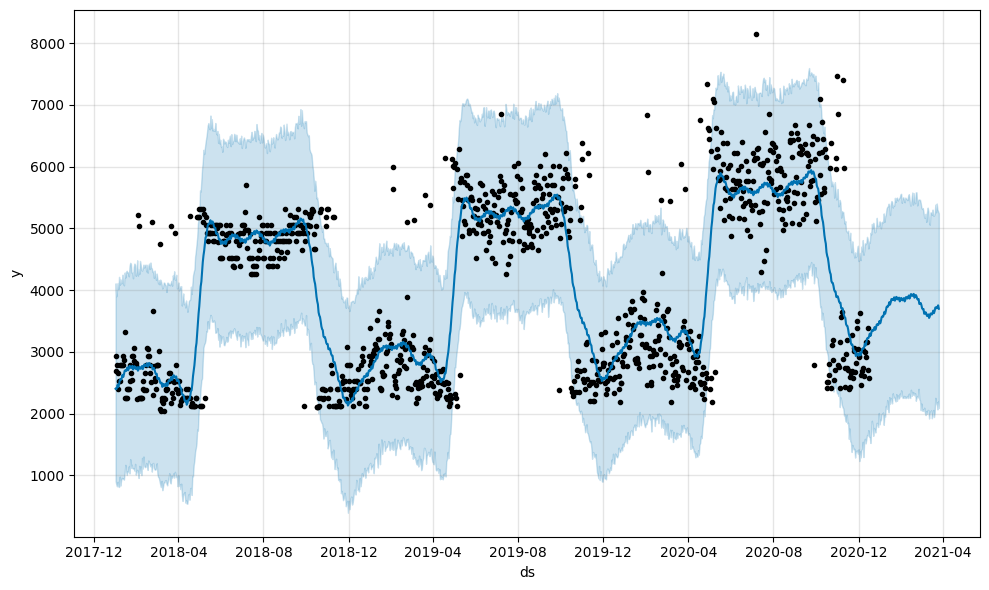

In [84]:
plot1=m.plot(forcast)

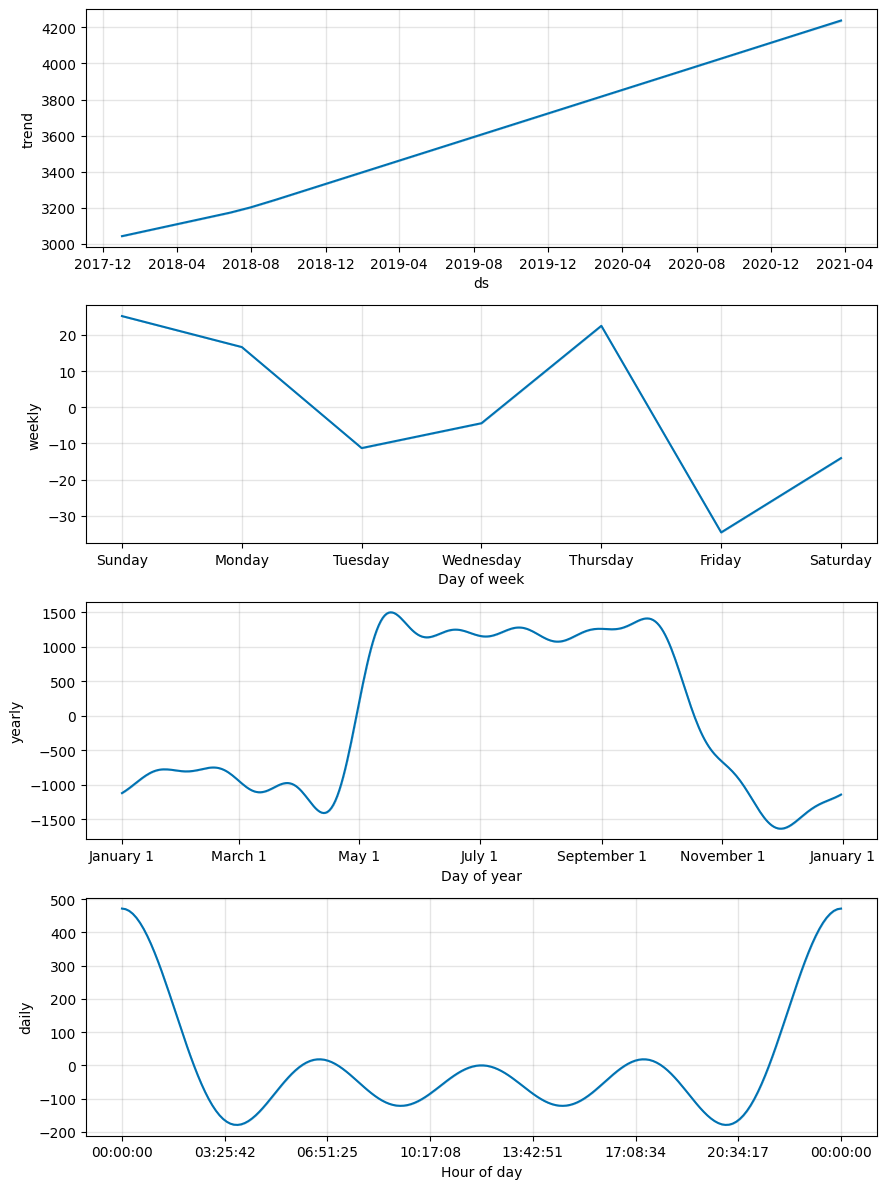

In [85]:
plot2=m.plot_components(forcast)